<font color=Steelblue size=5>Final Project - Seoul Bike Sharing Demand</font>

### <font color=Steelblue size=5>About the Dataset</font>

* __About__

    Rental bikes become more popular in each country these days, and they are mainly used for commuting. The dataset was collected from the rental bike system in Seoul, South Korea, and the data was recorded hourly every day from 2017/12 to 2018/11. 
    
    The goal of the analysis is the prediction of the hourly rented bike amount in order to lessen the waiting time. For more information about the dataset, you can visit the websit from [here](https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand).

* __Dataset Information__

    It is a regression problem. The dataset contains 8,760 observations and 14 features.

* __Feature Information__

    1. **Date** : format day-month-year
    1. **Rented Bike count** : number of rented bikes (<font color=tomato>Target</font>)
    1. **Hour** : 24-hour
    1. **Temperature** : degree Celsius
    1. **Humidity** : percent
    1. **Windspeed** : m/sec
    1. **Visibility** : 10m
    1. **Dew point temperature** : degree Celsius
    1. **Solar radiation : MJ/m2**
    1. **Rainfall** : mm
    1. **Snowfall** : cm
    1. **Seasons** : spring, summer, autumn, winter
    1. **Holiday** : Holiday / Non-holiday
    1. **Functional Day** : Whether the bike station is out of service or not

### <font color=Steelblue> Data Cleaning & EDA</font>

In [1]:
# Packages
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

from os import getcwd, chdir

folder = 'seoul_bike_demand'
if folder not in getcwd():
    chdir('/Users/ivan/Desktop/' + folder)
getcwd()

'/Users/ivanliu/Desktop/final'

In [2]:
# Plot parameter setting
%matplotlib inline
# Change plot style
plt.style.use('fivethirtyeight')
# Set figure size
plt.rcParams['figure.figsize'] = (12, 8)

In [ ]:
# Plot setting

#'Arial Unicode MS' MacOS font
plt.rcParams['font.sans-serif'] = 'Arial Unicode MS' 
plt.rcParams['axes.unicode_minus'] = False

# setting plot font size
parameters = {'axes.labelsize': 13, 'axes.titlesize': 16}
plt.rcParams.update(parameters)

#### <font color=tomato>Load Data</font>

In [3]:
# Set column data types
column_types = {'Seasons':'category',
              'Holiday':'category',
              'HourOfTheDay':'category',
              'FunctioningDay':'category'}

# Read the dataset: parse date and set column data types
df = pd.read_csv("SeoulBikeData_cleaned.csv",
                    parse_dates = ['Date'],
                    dayfirst = True,
                    dtype = column_types)
# Use only date
df["Date"] = pd.to_datetime(df["Date"]).dt.date
# Set dtype as datetime
df['Date']= pd.to_datetime(df['Date'])
# Preview
df.head()

,Date,RentedBikeCount,HourOfTheDay,Temperature_C,Humidity_percent,WindSpeed_ms,Visibility_10m,DewpointTemperature,SolarRadiation_MJm2,Rainfall_mm,Snowfall_cm,Seasons,Holiday,FunctioningDay
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


#### <font color=tomato>Data Info</font>

In [4]:
# Check if there are missing values
df.info()

# Print out the information of the dataset
print('\n------------------------ Data Info ------------------------')
print('Prediction Target: RentedBikeCount')
print(f'There are {df.shape[0]} observations.')
print(f'There are {df.shape[1]} features.')
print(f'There are {df.isnull().any().sum()} missing values.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 8760 non-null   datetime64[ns]
 1   RentedBikeCount      8760 non-null   int64         
 2   HourOfTheDay         8760 non-null   category      
 3   Temperature_C        8760 non-null   float64       
 4   Humidity_percent     8760 non-null   int64         
 5   WindSpeed_ms         8760 non-null   float64       
 6   Visibility_10m       8760 non-null   int64         
 7   DewpointTemperature  8760 non-null   float64       
 8   SolarRadiation_MJm2  8760 non-null   float64       
 9   Rainfall_mm          8760 non-null   float64       
 10  Snowfall_cm          8760 non-null   float64       
 11  Seasons              8760 non-null   category      
 12  Holiday              8760 non-null   category      
 13  FunctioningDay       8760 non-nul

In [45]:
# Inspect other types of missing values
na = [np.nan, None, [], {}, 'NaN', 'Null','NULL','None','NA','?','-', '.','', ' ', '   ']
print('Number of string type missing values of each column:\n')
for col in df.columns:
    string_null = np.array([x in na for x in df[col]])
    print(f'{col}: {string_null.sum()}') 

Number of string type missing values of each column:

Date: 0
RentedBikeCount: 0
HourOfTheDay: 0
Temperature_C: 0
Humidity_percent: 0
WindSpeed_ms: 0
Visibility_10m: 0
DewpointTemperature: 0
SolarRadiation_MJm2: 0
Rainfall_mm: 0
Snowfall_cm: 0
Seasons: 0
Holiday: 0
FunctioningDay: 0


#### <font color=tomato>EDA_part 1</font>

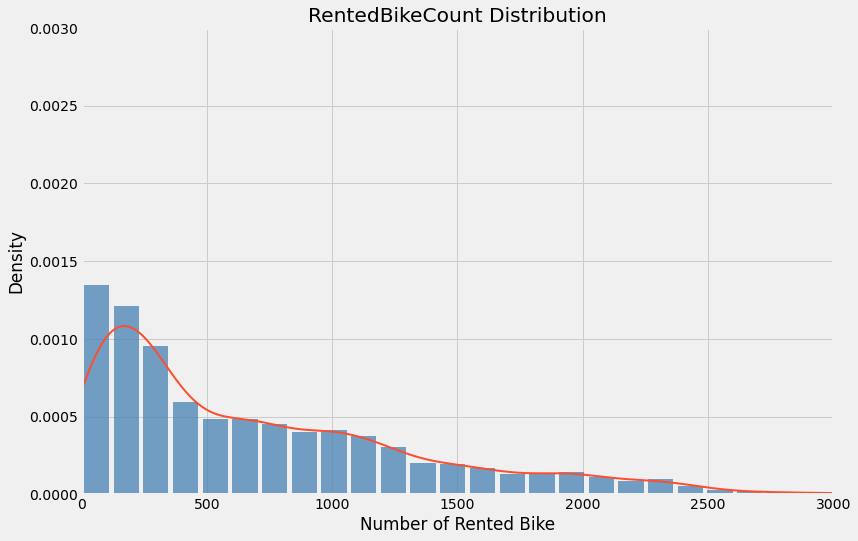

In [37]:
### Target distribution
ax1 = plt.subplot2grid((1, 1), (0, 0))

# Histogram
df['RentedBikeCount'].plot(bins = 30, 
                            kind = 'hist', 
                            density = True, 
                            rwidth = 0.85,
                            ax = ax1,
                            facecolor = 'steelblue', 
                            alpha = 0.75);

# KDE line
df['RentedBikeCount'].plot(kind = 'kde',
                            secondary_y = False, 
                            lw = 2);
ax1.set_title('RentedBikeCount Distribution')
ax1.set_xlabel('Number of Rented Bike')
plt.xlim(0, 3000)
plt.ylim(0, 0.003);

<font size=3>From the plot, 

* we can grasp a rough picture about the number of rented bikes during the year.

* There are small number of rented bike counts over 3000, and they might be outliers.</font>

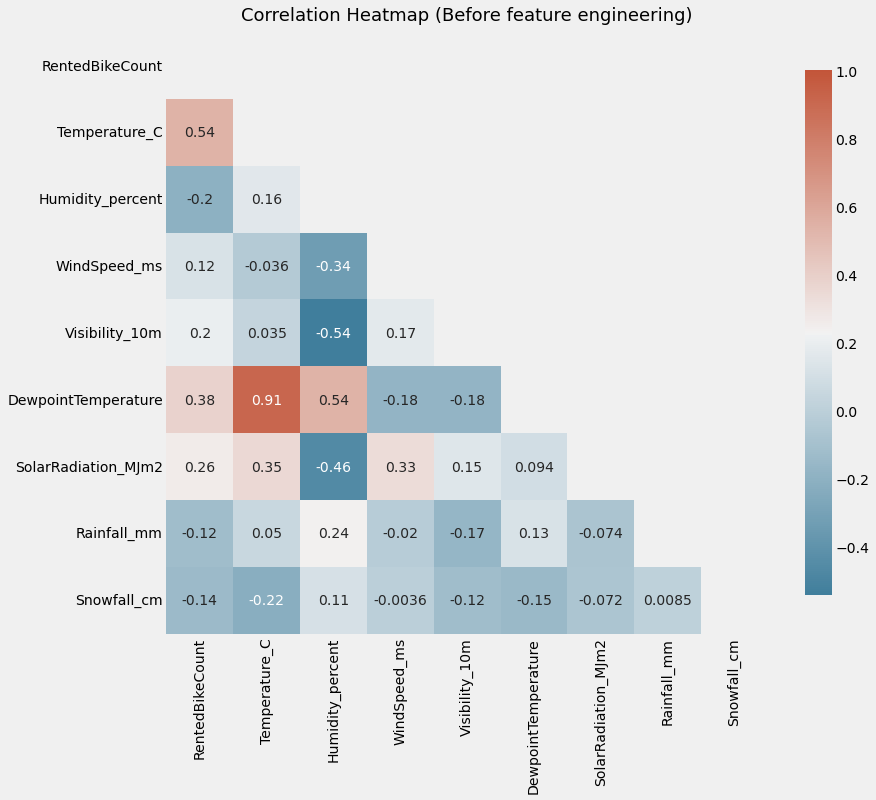

In [17]:
### Correlation plot
plt.figure(figsize=(12, 12))
# Get correlation of each numerical variables
corr = df.corr()
mask = np.triu(corr) 
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# set colormap
heatmap = sns.heatmap(corr, 
                      mask = mask, 
                      annot = True, 
                      cmap = cmap,
                      square = True, 
                      vmax = 1, 
                      cbar_kws = {"shrink": .75})
            
heatmap.set_title('Correlation Heatmap (Before feature engineering)', fontdict={'fontsize':18}, pad=12);

<font size=3>From the plot, we found

* Feature `DewpointTemperature` and `Temperature_C` are highly correlated. Since they both represent temperature, we can just choose one when training model. 

* On the other hand, temperature feature has higher correlation with the target `RentedBikeCount` among numerical features. There are some categorical features also relating to temperature, such as `month` and `Seasons`. We can plot the correlation heatmap again after feature engineering.</font>

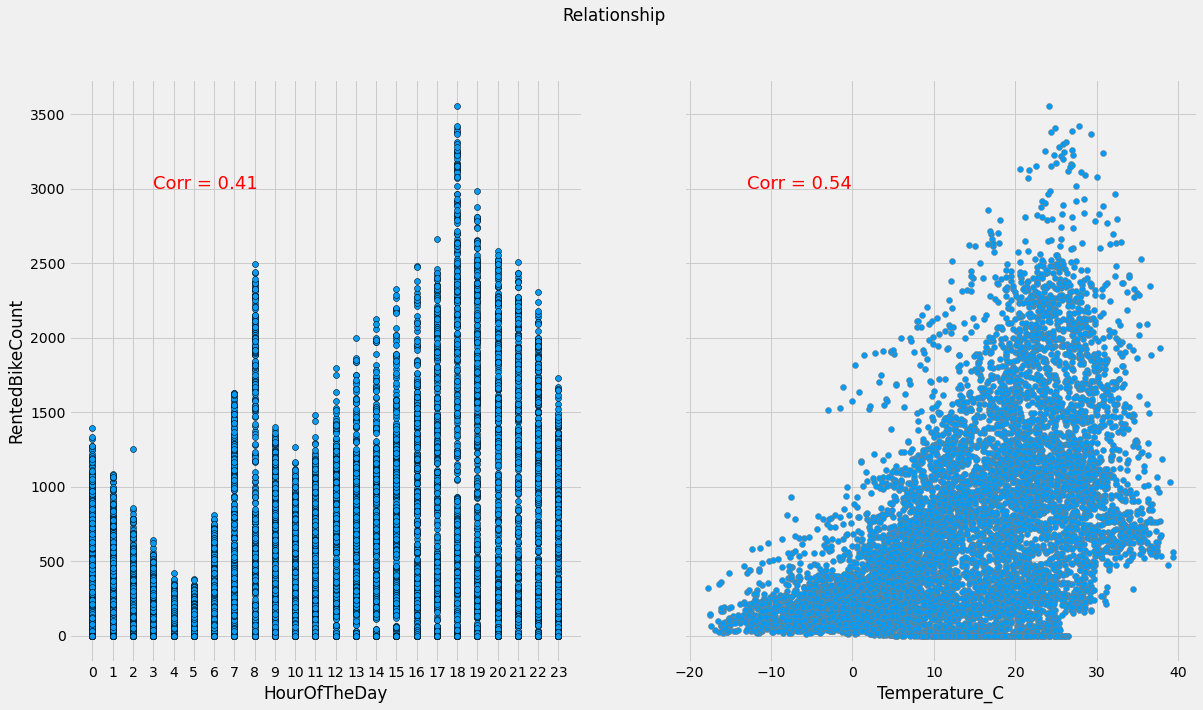

In [13]:
### Target with the feature HourOfTheDay and Temperature_C

# Subset of the data
df_1 = df[['HourOfTheDay', 'RentedBikeCount']]
df_2 = df[['Temperature_C', 'RentedBikeCount']]

fig, axes = plt.subplots(sharey = True,
                         nrows = 1, 
                         ncols = 2, 
                         figsize = (18, 10));
# Scatter plots
axes[0].scatter(df_1['HourOfTheDay'], df_1['RentedBikeCount'], facecolor = 'xkcd:azure', edgecolor = 'black')
axes[1].scatter(df_2['Temperature_C'], df_2['RentedBikeCount'], facecolor = 'xkcd:azure', edgecolor = 'gray')

# put corr values on the plots
axes[0].text(3, 3000, 'Corr = 0.41', c = 'red', fontsize = "18") # The value computed by transforming HourOfTheDay into numerical variable
axes[1].text(-13, 3000, 'Corr = 0.54', c = 'red', fontsize = "18")

# Set label & title names
axes[0].set_ylabel('RentedBikeCount', labelpad = 5)
axes[0].set_xlabel('HourOfTheDay', labelpad = 5)
axes[1].set_xlabel('Temperature_C', labelpad = 5)
fig.suptitle('Relationship');

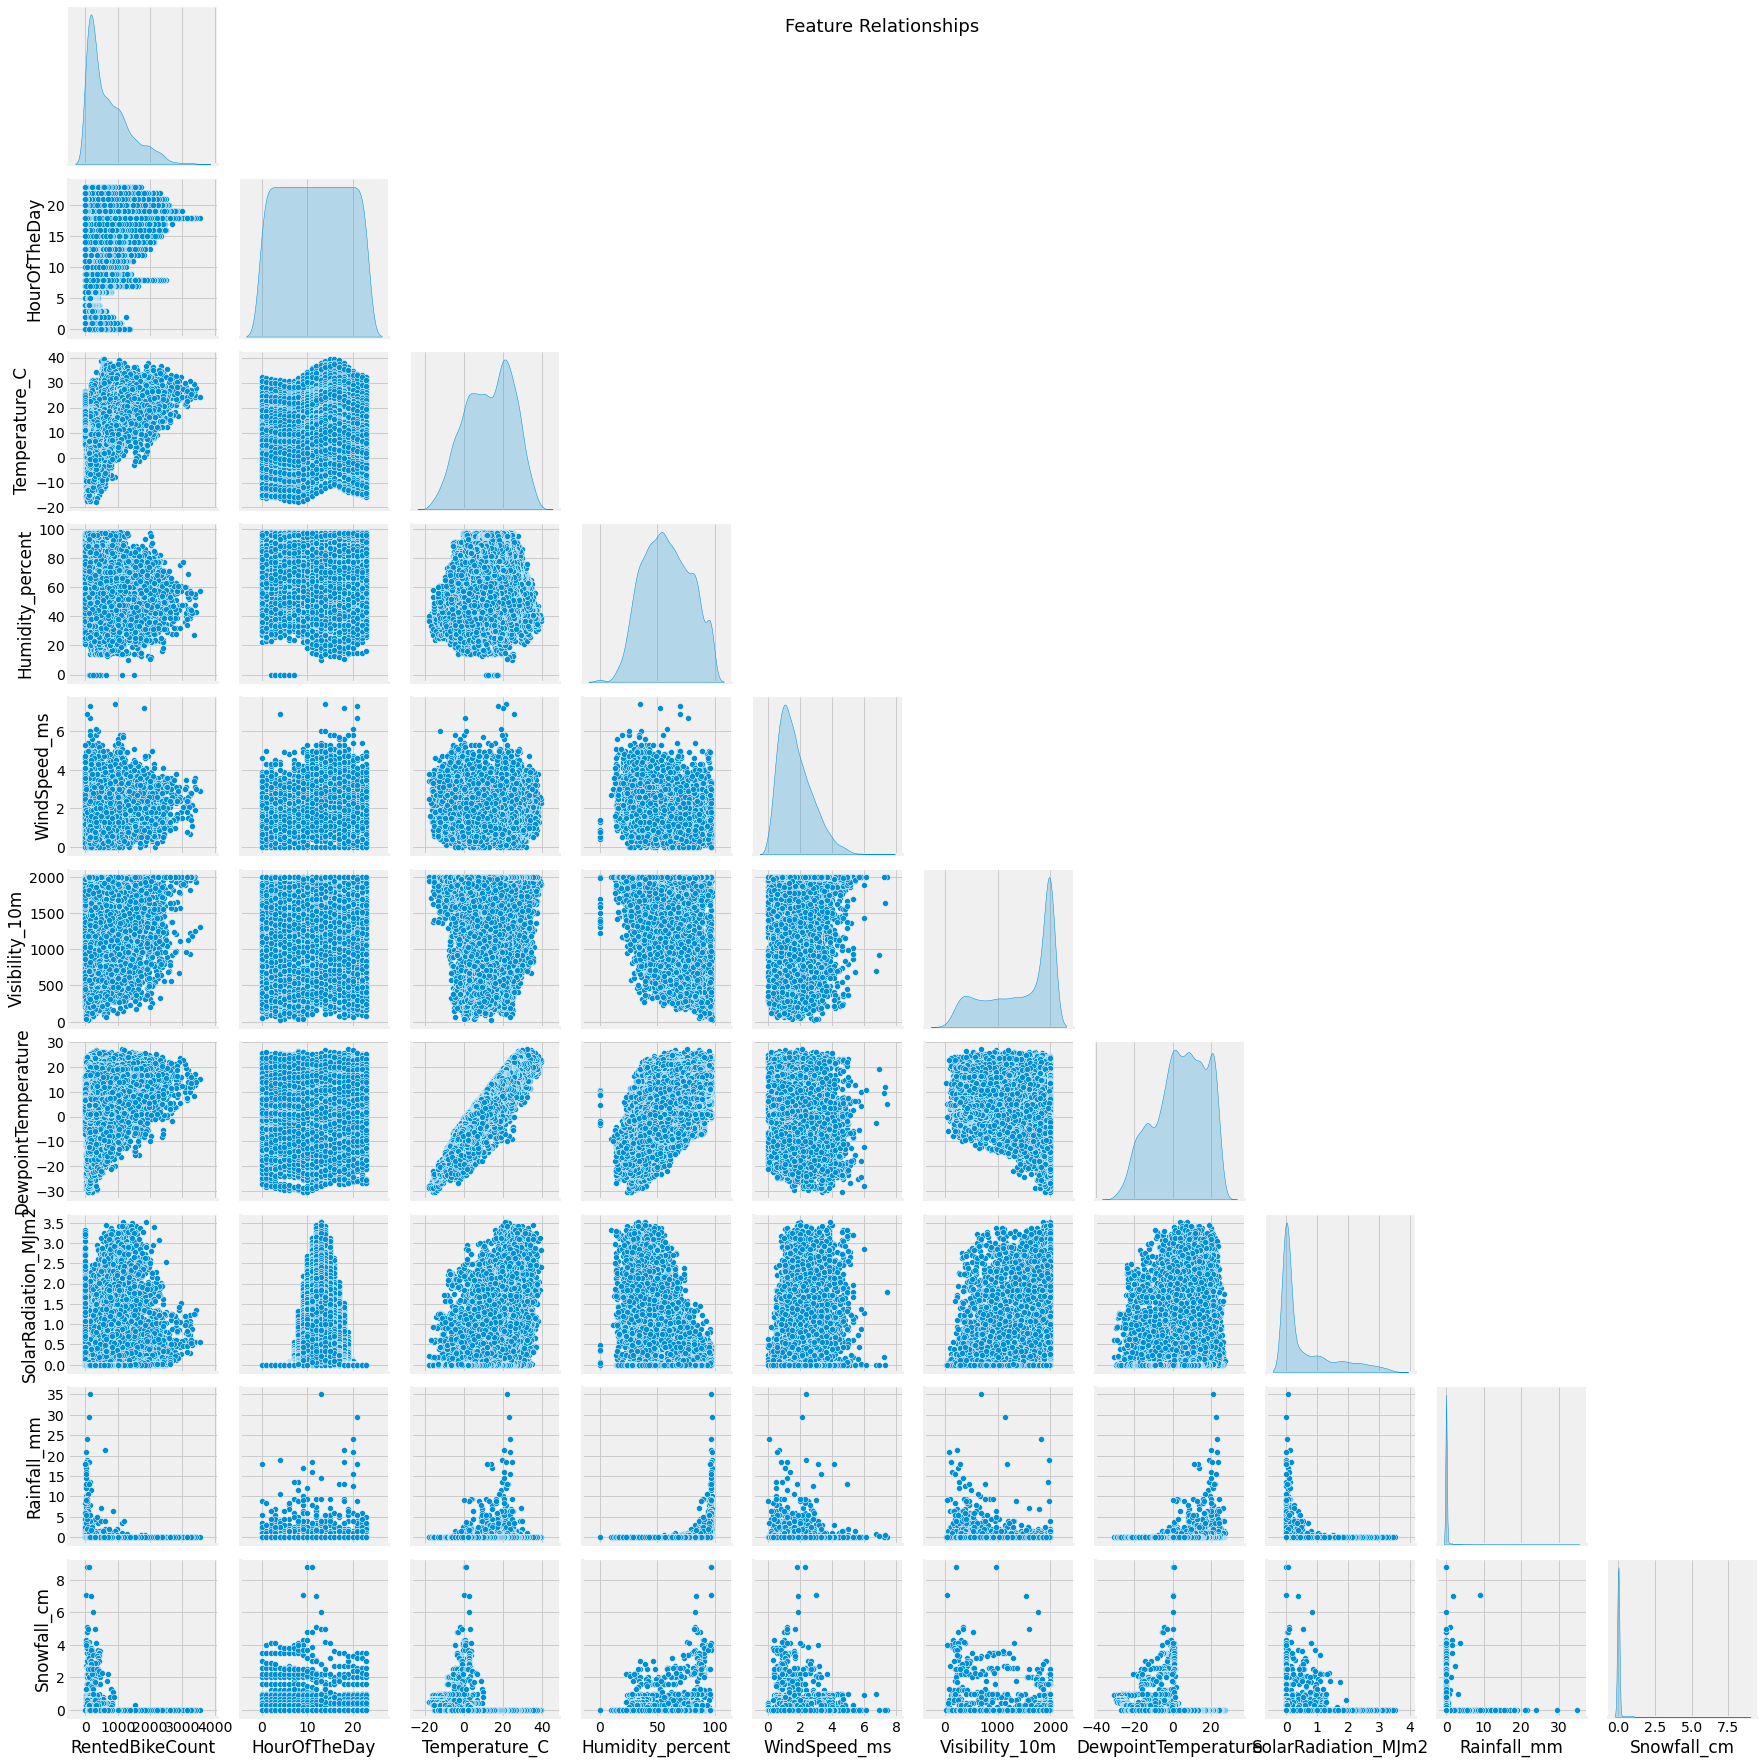

In [6]:
# Pair plot
plot = sns.pairplot(df,
                    diag_kind = 'kde',
                    corner = True)
# Add plot title
plot.fig.suptitle("Feature Relationships", size = 18)
# Make the ticklabel bigger
sns.set_context("paper", rc={"axes.labelsize":26});

<font size=4>Let's explore the dataset from the aspect of categorical features.</font>

In [17]:
# Understanding more about the Functioning Day and Holiday.
df.groupby(["FunctioningDay", 'Holiday']).size().unstack().style.highlight_max(['Holiday', 'No Holiday'], props='color:white;background-color:lightcoral')

Holiday,Holiday,No Holiday
FunctioningDay,,
No,24,271
Yes,408,8057


<font size=4>From the table, we found that most of the observations were `No Holiday` and `Functioning`.</font>

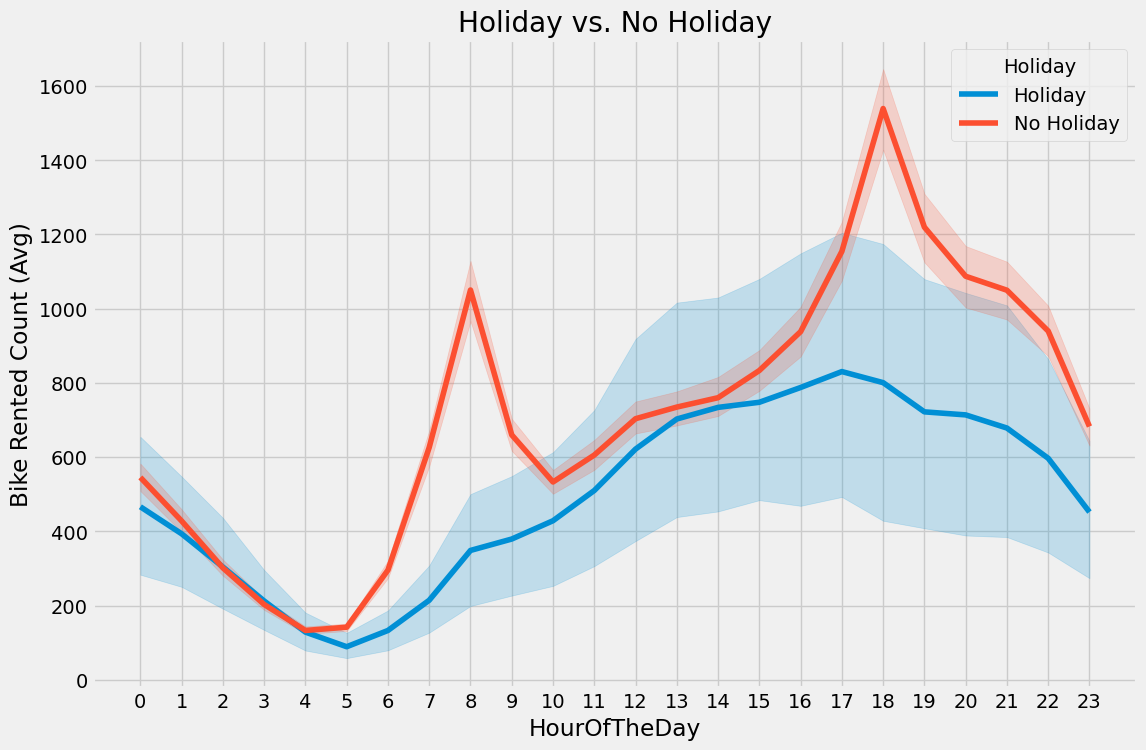

In [25]:
# Compare the difference between Holiday & No Holiday.
items = [ 'RentedBikeCount', 'HourOfTheDay', 'Holiday' ]
df_holiday = df.filter(items)
df_holiday.HourOfTheDay = df_holiday.HourOfTheDay.astype(int)

# Plot
plt.ylabel("Bike Rented Count (Avg)",)
plt.title("Holiday vs. No Holiday",)
sns.lineplot(y="RentedBikeCount", x="HourOfTheDay", hue="Holiday", data=df_holiday)
plt.xticks(df_holiday.HourOfTheDay.unique())
plt.show();

<font size=4>From the plot, 
* we can clearly see that the pattern of `Holiday` and `No Holiday` are the same, but the number of rented bikes on `Holiday` fluctuates more dramatically due to less data in the dataset. 

* On the other hand, we can also infer that the <font color=tomato>__bikes are mainly used for commuting__</font> since it peaked at eight in the morning as well as at six in the evening on non-holidays.

* We will take a deeper look at the feature `HourOfTheDay`.</font>

In [27]:
# Add a now column into df_holiday
columns = df_holiday.columns.tolist()
new_col = 'Hour_group'
columns.insert(2, new_col)

# Bin the hours into six discrete intervals
labels = [f'hour_group_{i}' for i in range(1, 7)]
df_holiday[new_col] = pd.cut(x=df_holiday.HourOfTheDay, 
                             bins=6, 
                             labels=labels)


In [28]:
# To aggregate by Hour_group
df_hour = df_holiday.groupby(['Hour_group']).RentedBikeCount.agg(['sum', 'mean'])

(df_hour.style
     .format('{:.0f}', subset='mean')
     .highlight_max('sum', props='color:white;background-color:red')
     .background_gradient('Greens', subset='mean')
)

,sum,mean
Hour_group,,
hour_group_1,537501,368
hour_group_2,425314,291
hour_group_3,1018481,698
hour_group_4,1102555,755
hour_group_5,1740030,1192
hour_group_6,1348433,924


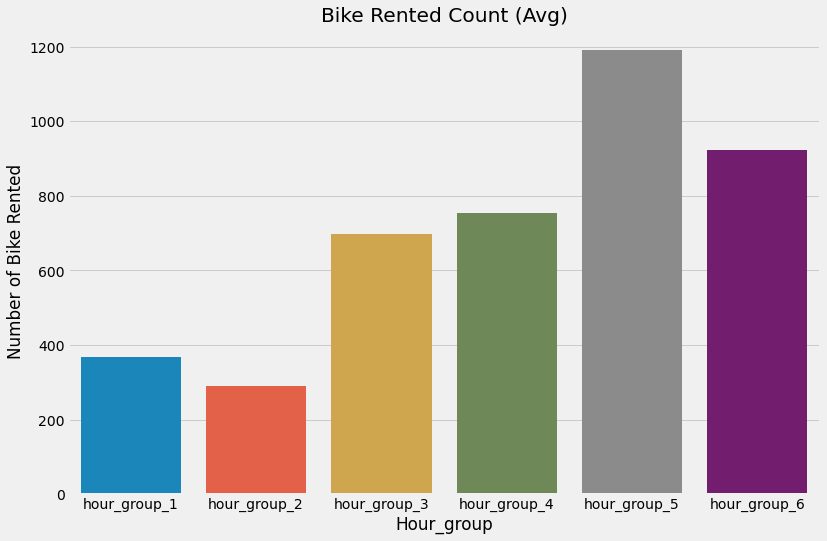

In [34]:
# Create a plot using the mean value of RentedBikeCount in each Hour group
sns.barplot(x = df_hour.index, y = 'mean', data = df_hour)
plt.ylabel("Number of Bike Rented")
plt.title("Bike Rented Count (Avg)");

<font size=4>From the table and plot, 

* we can see that <font color=tomato>__the highest need of the rental bikes is in the evening__</font> so it would be important for the rental bike company to supply ample bikes during these hours.

* There are still two categorical features, `Seasons` and `month`, not being explored, and we will link them with temperature together.</font>

In [37]:
# Needed columns
col = ['Date', 'RentedBikeCount', 'HourOfTheDay', 'Temperature_C', 'Seasons']
# Create a subset of the data
df2 = df.loc[:, col].copy()

# Set the Date column as DataFrame's index
df2 = df2.set_index('Date')
df2.head()

,RentedBikeCount,HourOfTheDay,Temperature_C,Seasons
Date,,,,
2017-12-01,254,0,-5.2,Winter
2017-12-01,204,1,-5.5,Winter
2017-12-01,173,2,-6.0,Winter
2017-12-01,107,3,-6.2,Winter
2017-12-01,78,4,-6.0,Winter


In [49]:
# Grouping the data by each month (from 2017/12 to 2018/11) and calculate the mean value of the Bike Rented Count
print('The average number of rented bikes in each month. ')
(pd.DataFrame(df2.resample('M').RentedBikeCount.mean(),).style
     .format('{:.0f}', subset='RentedBikeCount')
     .background_gradient('Blues', subset='RentedBikeCount')
     .highlight_max('RentedBikeCount', props='color:red')
)

The average number of rented bikes in each month. 


,RentedBikeCount
Date,
2017-12-31 00:00:00,249
2018-01-31 00:00:00,202
2018-02-28 00:00:00,226
2018-03-31 00:00:00,512
2018-04-30 00:00:00,728
2018-05-31 00:00:00,950
2018-06-30 00:00:00,1246
2018-07-31 00:00:00,987
2018-08-31 00:00:00,876


In [51]:
# the mean value of the temperature each month
print('The mean value of the temperature in each month.')
(pd.DataFrame(df2.resample('M').Temperature_C.mean(),).style
     .format('{:.0f}', subset='Temperature_C')
     .background_gradient('Blues', subset='Temperature_C')
)

The mean value of the temperature in each month.


,Temperature_C
Date,
2017-12-31 00:00:00,-2
2018-01-31 00:00:00,-4
2018-02-28 00:00:00,-2
2018-03-31 00:00:00,8
2018-04-30 00:00:00,13
2018-05-31 00:00:00,18
2018-06-30 00:00:00,23
2018-07-31 00:00:00,28
2018-08-31 00:00:00,29


In [52]:
# Concatenate the two series as a dataframe
month = df2.resample('M').RentedBikeCount.mean().round()
temp = df2.resample('M').Temperature_C.mean().round()
month_temp = pd.concat([month, temp], axis = 1)

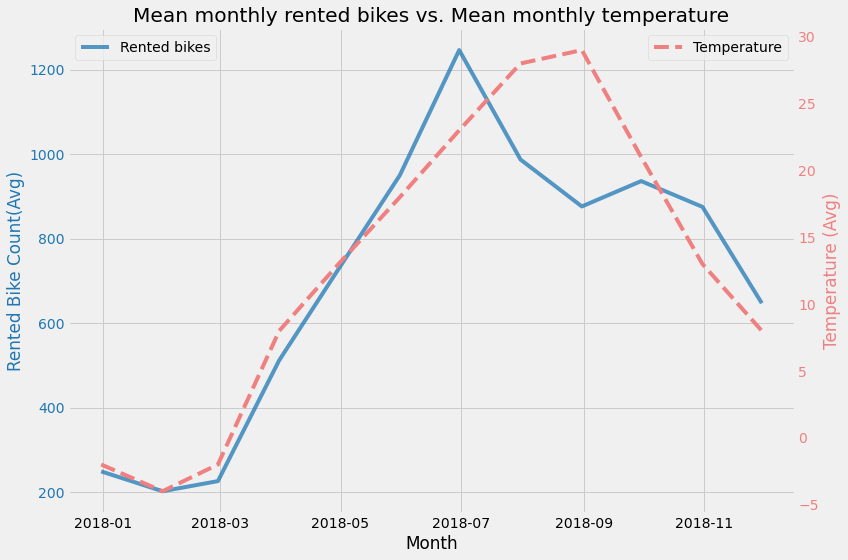

In [56]:
# Create a plot to observe the relationship among month, temperature, and rented bikes
fig, ax1 = plt.subplots(sharex = True,)

# Ｓet the first subplot
ax1.plot(month_temp.RentedBikeCount, color='tab:blue', alpha=0.75, label = 'Rented bikes')
ax1.set_ylabel('Rented Bike Count(Avg)', color='tab:blue', fontsize='large')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Then, set the second subplot
ax2 = ax1.twinx()
ax2.plot(month_temp.Temperature_C, color='lightcoral', alpha=1, ls = '--', label = 'Temperature')
ax2.set_ylabel('Temperature (Avg)', color='lightcoral', fontsize='large')
ax2.tick_params(axis='y', labelcolor='lightcoral')

ax1.set_title("Mean monthly rented bikes vs. Mean monthly temperature",)
ax1.set_xlabel("Month",)
ax2.grid(False)
ax1.legend(loc = 2)
ax2.legend(loc = 1)
fig.tight_layout()

<font size=4>From the tables and plot above, 

* we can see that <font color=tomato>__higher need of the rental bikes is from April to October(#bikes > 700 )__</font>. Thus, a better stragegy for the rental bike company would be : 
    1. providing ample bikes during these months, and

    2. carrying out routine maintenance in the months with less bikes need, such as from December to February.

* Another important finding, <font color=tomato>__the changes of the rented bikes follows the same pattern as the temperature's__</font>. People in Seoul tend not to rent bikes when the it is too cold.

* Let's see if the same condition happens in terms of seasons.</font>

In [58]:
# Grouping the data by seasons(Spring, Summer, Autumn, Winter)
df_season = df2.groupby(['Seasons']).RentedBikeCount.agg(['sum', 'mean'])

print('The total and average number of rented bikes in each season. ')
(df_season.style
     .format('{:.0f}', subset='mean')
     .highlight_max('sum', props='color:white;background-color:coral')
     .highlight_min('sum', props='color:white;background-color:skyblue')
     .background_gradient('Greens', subset='mean')
)

The total and average number of rented bikes in each season. 


,sum,mean
Seasons,,
Autumn,1790002,820
Spring,1611909,730
Summer,2283234,1034
Winter,487169,226


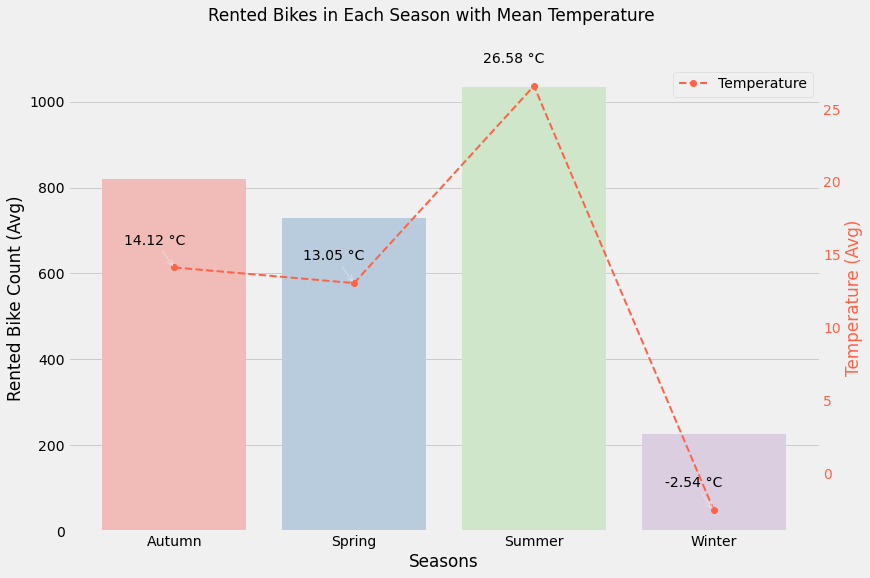

In [124]:
# Create a plot using the mean value of RentedBikeCount in each season
fig, ax = plt.subplots()

# Plot of avg rented bikes
sns.barplot(x = df_season.index, y = "mean", data = df_season, ax = ax, palette = 'Pastel1')
# Plot of avg season temperature
ax2 = ax.twinx()
temp = df2.groupby('Seasons').Temperature_C.agg(['mean'])['mean']
ax2.plot(temp.index, temp, marker = 'o', label = 'Temperature', c = 'tomato', lw = 2, ls = "--")
ax2.set_ylabel('Temperature (Avg)', color='tomato',)
ax2.tick_params(axis='y', labelcolor='tomato')
ax2.legend()
ax2.grid(False)

# Annotation
labels = [f"{i:.2f} °C" for i in temp]
for label, x, y in zip(labels, temp.index, temp):
   ax2.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='center', va='bottom',
        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

ax.set_ylabel("Rented Bike Count (Avg)")
fig.suptitle("Rented Bikes in Each Season with Mean Temperature");

<font size=4> Great! From the table and plot above, we can see the same condition that <font color=tomato>__the overall need of the rental bikes is affected by temperature__</font> in terms of seasons. 

According to our exploratory data analysis, we find that `HourOfTheDay` and `Temperature` can have stronger influence on our target, `RentedBikeCount`. 

Next, since we want to solve the regression problem, we will apply some feature encoding techniques to categorical features and start machine learning!

Let's go 🏃🏻‍♂️!</font>

### <font color=steelblue>Feature Engineering</font>

#### <font color=tomato>Add Feature</font>

In [4]:
# Add feature: month
df['month'] = df['Date'].apply(lambda x : x.month).astype('category')
# Create another df for encoding
df_encode = df.copy()
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 8760 non-null   datetime64[ns]
 1   RentedBikeCount      8760 non-null   int64         
 2   HourOfTheDay         8760 non-null   category      
 3   Temperature_C        8760 non-null   float64       
 4   Humidity_percent     8760 non-null   int64         
 5   WindSpeed_ms         8760 non-null   float64       
 6   Visibility_10m       8760 non-null   int64         
 7   DewpointTemperature  8760 non-null   float64       
 8   SolarRadiation_MJm2  8760 non-null   float64       
 9   Rainfall_mm          8760 non-null   float64       
 10  Snowfall_cm          8760 non-null   float64       
 11  Seasons              8760 non-null   category      
 12  Holiday              8760 non-null   category      
 13  FunctioningDay       8760 non-nul

* <font size=4>Note:

    The feature `HourOfTheDay` explained the target on a daily and hourly basis. Adding `month` can view the change of rental bike needs in a broader time range. </font>

#### <font color=tomato>Category Encoding</font>

<font size=4>There are five categorical features: `HourOfTheDay`, `Seasons`, `month`, `Holiday`, and `FunctioningDay`, and we are going to apply different techniques to transform them into numerical variables.</font>

In [5]:
# Transform FunctioningDay(Yes, No) as (1, 0)
df_encode['FunctioningDay'] = df_encode['FunctioningDay'].apply(lambda x: 1 if x == 'Yes' else 0).astype(int)
df_encode.head()

,Date,RentedBikeCount,HourOfTheDay,Temperature_C,Humidity_percent,WindSpeed_ms,Visibility_10m,DewpointTemperature,SolarRadiation_MJm2,Rainfall_mm,Snowfall_cm,Seasons,Holiday,FunctioningDay,month
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1,12
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1,12
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,1,12
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1,12
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,1,12


* <font size=4>Note:

    The reason why setting `No` as `0` is because the non-functioning days are less than 3% of all, so it would not cause too many zeros in data. On the other hand, if the bike station doesn't work, then it makes little sense to predict the need of bikes.</font>

In [6]:
# Transform Holiday(Yes, No) as (-1, 1)
df_encode['Holiday'] = df_encode['Holiday'].apply(lambda x: 1 if x == 'No Holiday' else -1).astype(int)
df_encode.head()

,Date,RentedBikeCount,HourOfTheDay,Temperature_C,Humidity_percent,WindSpeed_ms,Visibility_10m,DewpointTemperature,SolarRadiation_MJm2,Rainfall_mm,Snowfall_cm,Seasons,Holiday,FunctioningDay,month
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,1,1,12
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,1,1,12
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,1,1,12
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,1,1,12
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,1,1,12


* <font size=4>Note:

    Based on our EDA result, the reason why setting `No Holiday` as `1` is because the observations are almost not holiday.</font>

In [7]:
import category_encoders as ce
# encoder = ce.LeaveOneOutEncoder(cols=['Seasons'])

# Apply LeaveOneOutEncoder to feature Seasons and month
encoder = ce.CatBoostEncoder(cols=['Seasons', 'month'])
df_encoded = encoder.fit_transform(df_encode, df_encode.RentedBikeCount)

# Apply Generalized Linear Mixed Model Encoder to feature HourOfTheDay
encoder = ce.GLMMEncoder(cols=['HourOfTheDay'], binomial_target = False)
df_encoded = encoder.fit_transform(df_encoded, df_encoded.RentedBikeCount)


* <font size=4>Note:

    1. To examine feature relationships as a whole, the encoding techniques were applied to the whole dataset.

    2. According to our EDA results, `Seasons` and `month` have stronger connection with temperature, so they were applied to the same target encoding techniques.

    3. We'd like to find if there are some statistical connection between `HourOfTheDay` and the target, so the `GLMMEncoder` encoder was selected for encoding.

    The [link](https://contrib.scikit-learn.org/category_encoders/index.html) provides more detailed information about category_encoder used in this project.</font>

### <font color=Steelblue>Machine Learning</font>

In [7]:
# Packages for ML
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Models
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR, LinearSVR
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor


In [8]:
# Split the training and testing dataset randomly without date order before applying category_encoders
from sklearn.model_selection import train_test_split
import category_encoders as ce

# Date information is not related to the problem, we remove it
X = df_encode.drop(['RentedBikeCount', 'Date'], axis = 1)
y = df_encode.RentedBikeCount
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5509)

# Apply CatBoostEncoder to feature Seasons & month
encoder = ce.CatBoostEncoder(cols=['Seasons', 'month'])
X_train = encoder.fit_transform(X_train, y_train)
X_test = encoder.transform(X_test)

# Apply Generalized Linear Mixed Model Encoder to feature HourOfTheDay
encoder = ce.GLMMEncoder(cols=['HourOfTheDay'])
X_train = encoder.fit_transform(X_train, y_train)
X_test = encoder.transform(X_test)

print('Shape of training data', X_train.shape)
print('Shape of testing data', X_test.shape)

Shape of training data (6132, 13)
Shape of testing data (2628, 13)


In [11]:
X_train.head()

,HourOfTheDay,Temperature_C,Humidity_percent,WindSpeed_ms,Visibility_10m,DewpointTemperature,SolarRadiation_MJm2,Rainfall_mm,Snowfall_cm,Seasons,Holiday,FunctioningDay,month
3308,345.238454,12.5,31,3.8,1746,-4.2,0.00,0.0,0.0,702.150522,1,1,702.150522
3008,321.007166,6.7,94,2.7,1127,5.7,0.05,2.0,0.0,996.075261,1,1,996.075261
5260,-563.195018,18.4,57,1.1,2000,9.7,0.00,0.0,0.0,702.150522,1,1,702.150522
7825,-281.771956,11.1,62,0.2,666,4.0,0.00,0.0,0.0,702.150522,1,1,702.150522
8391,153.708582,16.1,30,1.0,1125,-1.5,1.06,0.0,0.0,624.575261,1,1,702.150522


In [46]:
# Standardization
df_scaled = df_encode.copy()
cols = ['HourOfTheDay', 'Temperature_C', 'Humidity_percent', 'WindSpeed_ms', 'Visibility_10m', 'DewpointTemperature', 'SolarRadiation_MJm2', 'Rainfall_mm',
       'Snowfall_cm', 'Holiday', 'FunctioningDay', 'month']
df_x = df_scaled[cols]
df_scaled[cols] = (df_x - df_x.mean()) / df_x.std()
df_scaled.head()

,Date,RentedBikeCount,HourOfTheDay,Temperature_C,Humidity_percent,WindSpeed_ms,Visibility_10m,DewpointTemperature,SolarRadiation_MJm2,Rainfall_mm,Snowfall_cm,Seasons,Holiday,FunctioningDay,month
0,2017-12-01,254,-1.661230,-1.513871,-1.042423,0.458450,0.925818,-1.659510,-0.655094,-0.131792,-0.171881,Winter,0.227744,0.186669,1.587557
1,2017-12-01,204,-1.516775,-1.538986,-0.993313,-0.892511,0.925818,-1.659510,-0.655094,-0.131792,-0.171881,Winter,0.227744,0.186669,1.587557
2,2017-12-01,173,-1.372320,-1.580845,-0.944203,-0.699516,0.925818,-1.667167,-0.655094,-0.131792,-0.171881,Winter,0.227744,0.186669,1.587557
3,2017-12-01,107,-1.227866,-1.597589,-0.895093,-0.796013,0.925818,-1.659510,-0.655094,-0.131792,-0.171881,Winter,0.227744,0.186669,1.587557
4,2017-12-01,78,-1.083411,-1.580845,-1.091533,0.554947,0.925818,-1.736077,-0.655094,-0.131792,-0.171881,Winter,0.227744,0.186669,1.587557


#### <font color=tomato>OLS</font>

Use linear regression from `statsmodels` and `sklearn` to train the model and examine the results.

In [37]:
ols_train_data = pd.concat([X_train, y_train], axis=1)
formula = 'RentedBikeCount ~ HourOfTheDay+Temperature_C+Humidity_percent+WindSpeed_ms+Visibility_10m+SolarRadiation_MJm2+Rainfall_mm+Snowfall_cm+Seasons+Holiday+FunctioningDay+month'
model = smf.ols(formula=formula, data = ols_train_data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        RentedBikeCount   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     1013.
Date:                Sun, 20 Nov 2022   Prob (F-statistic):               0.00
Time:                        15:59:39   Log-Likelihood:                -44997.
No. Observations:                6132   AIC:                         9.002e+04
Df Residuals:                    6119   BIC:                         9.011e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -482.7755    

* <font size=4>The result shows that `Visibility_10m` and `Snowfall_cm` have larger p-values, so we remove them to see if the model could be better. On the other hand, since `Temperature_C` and `DewpointTemperature` are high correlated, here we choose `Temperature_C`.</font>

In [38]:
formula = 'RentedBikeCount ~ HourOfTheDay+Temperature_C+Humidity_percent+WindSpeed_ms+SolarRadiation_MJm2+Rainfall_mm+Seasons+Holiday+FunctioningDay+month'
model = smf.ols(formula=formula, data = ols_train_data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        RentedBikeCount   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     1216.
Date:                Sun, 20 Nov 2022   Prob (F-statistic):               0.00
Time:                        16:00:05   Log-Likelihood:                -44998.
No. Observations:                6132   AIC:                         9.002e+04
Df Residuals:                    6121   BIC:                         9.009e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -462.6705    

* <font size=4>Though we removed `Visibility_10m` and `Snowfall_cm`, the R square value didn't change, which implies that adding these two variables won't do much help when predicting the target.</font>

In [39]:
# Prediction
y_pred = model.predict(X_test)
# print(f'Score: on testing, {model.score(X_test, y_test):.3f}')
print(f'MAE: {mean_absolute_error(y_test, y_pred):.2f}')


MAE: 292.22


#### <font color=tomato>Linear Regression</font>

In [45]:
# LinearRegression
reg = LinearRegression().fit(X_train, y_train)
print(f'Score on training: {reg.score(X_train, y_train):.3f}')
y_pred = reg.predict(X_test)
print(f'Score on testing: {reg.score(X_test, y_test):.3f}')
print(f'MAE: {mean_absolute_error(y_test, y_pred):.2f}')


Score on training: 0.666
Score on testing: 0.657
MAE: 291.42


* <font size=4>The two `MAE` results from two different packages are almost the same.</font>

#### <font color=tomato>Random Forest</font>

* <font size=4>Apply random search first to get a rough idea about the setting of hyperparametes.</font>

In [9]:
# The number of trees in the forest
n_estimators = [int(i) for i in np.linspace(start = 200, stop = 2000, num = 10)]
# The number of features to consider when looking for the best split
max_features = ['sqrt', 'auto']
# Maximum number of levels in tree
max_depth = [int(i) for i in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Whether bootstrap samples are used when building trees.
bootstrap = [True, False]
# Complexity parameter used for Minimal Cost-Complexity Pruning. 
ccp_alpha = np.logspace(-5, 5, 11, base = 2)
# Parameters for random search
random_search = {'n_estimators': n_estimators,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'ccp_alpha' : ccp_alpha,
                'bootstrap': bootstrap}
pprint(random_search)

{'bootstrap': [True, False],
 'ccp_alpha': array([3.125e-02, 6.250e-02, 1.250e-01, 2.500e-01, 5.000e-01, 1.000e+00,
       2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01, 3.200e+01]),
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['sqrt', 'auto'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [10]:
# Use the random grid to search for best hyperparameters
rfr = RandomForestRegressor()
rfr_random = RandomizedSearchCV(estimator = rfr, param_distributions = random_search, n_iter = 100, cv = 3, verbose=0, random_state = 5509, n_jobs = -1)
rfr_random.fit(X_train, y_train)

/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the defa

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'ccp_alpha': array([3.125e-02, 6.250e-02, 1.250e-01, 2.500e-01, 5.000e-01, 1.000e+00,
       2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01, 3.200e+01]),
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['sqrt', 'auto'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=5509)

In [44]:
# The best hyperparameters without ccp_alpha
rfr_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': False}

In [51]:
# Parameters for grid search
param_grid = {
    'bootstrap': [False],
    'max_features' : ['sqrt'],
    'max_depth': [50, 60, 70],
    'min_samples_leaf': [1, 3],
    'min_samples_split': [1, 2, 3],
    'n_estimators': [500, 800, 1000]
}
# Grid search
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 0)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


/Users/ivanliu/opt/miniconda3/envs/new/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/ivanliu/opt/miniconda3/envs/new/lib/python3.9/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan 0.86428924 0.86426934 0.86465284
 0.86405526 0.86469331 0.86423695        nan        nan        nan
 0.85867275 0.85866337 0.85862565 0.85856465 0.85846521 0.8588105
        nan        nan        nan 0.86496811 0.864731   0.86507841
 0.86417333 0.86441118 0.86466492        nan        nan        nan
 0.85895122 0.85885149 0.85900675 0.85851022 0.85853364 0.8587022
        nan        nan        nan 0.86518547 0.86522513 0.86527621
 0.86450775 0.86451943 0.86461596        nan        nan        nan
 0.85850761 0.85827131 0

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [50, 60, 70],
                         'max_features': ['sqrt'], 'min_samples_leaf': [1, 3],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [500, 800, 1000]},
             verbose=2)

In [60]:
# Get the best model from grid search
best_model = grid_search.best_estimator_
# Print out the results
print(f'Best score: {grid_search.best_score_:.3f}\n')
print('Best parameters:')
pprint(grid_search.best_params_)
print(f'\nTest data score: {grid_search.score(X_test, y_test):.3f}')
# Prediction
y_pred = best_model.predict(X_test)
print(f'MAE: {mean_absolute_error(y_test, y_pred):.2f}')

Best score: 0.865

Best parameters:
{'bootstrap': False,
 'max_depth': 70,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

Test data score: 0.881
MAE: 139.18


In [10]:
# Parameters for grid search
param_grid = {
    'bootstrap': [False],
    'max_features' : ['sqrt'],
    'max_depth': [50, 60, 70],
    'min_samples_leaf': [1, 3],
    'min_samples_split': [1, 2, 3],
    'n_estimators': [500, 800, 1000]
}
# Grid search
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 0)
grid_search.fit(X_train, y_train)

/Users/ivanliu/opt/miniconda3/envs/new/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/ivanliu/opt/miniconda3/envs/new/lib/python3.9/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan 0.86472041 0.86519775 0.86441912
 0.86501246 0.86445902 0.86492514        nan        nan        nan
 0.85813694 0.85855987 0.85880034 0.85846719 0.85808246 0.85853256
        nan        nan        nan 0.86378183 0.86475638 0.86470876
 0.86434737 0.86475159 0.8646437         nan        nan        nan
 0.85885118 0.85854918 0.85862893 0.85913332 0.85855055 0.85917947
        nan        nan        nan 0.86481418 0.86437959 0.86478219
 0.86474678 0.86436832 0.86491024        nan        nan        nan
 0.85837283 0.85891943

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [50, 60, 70],
                         'max_features': ['sqrt'], 'min_samples_leaf': [1, 3],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [500, 800, 1000]})

In [11]:
# Get the best model from grid search
best_model = grid_search.best_estimator_
# Print out the results
print(f'Best score: {grid_search.best_score_:.3f}\n')
print('Best parameters:')
pprint(grid_search.best_params_)
print(f'\nTest data score: {grid_search.score(X_test, y_test):.3f}')
# Prediction
y_pred = best_model.predict(X_test)
print(f'MAE: {mean_absolute_error(y_test, y_pred):.2f}')

Best score: 0.865

Best parameters:
{'bootstrap': False,
 'max_depth': 50,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 800}

Test data score: 0.881
MAE: 139.79


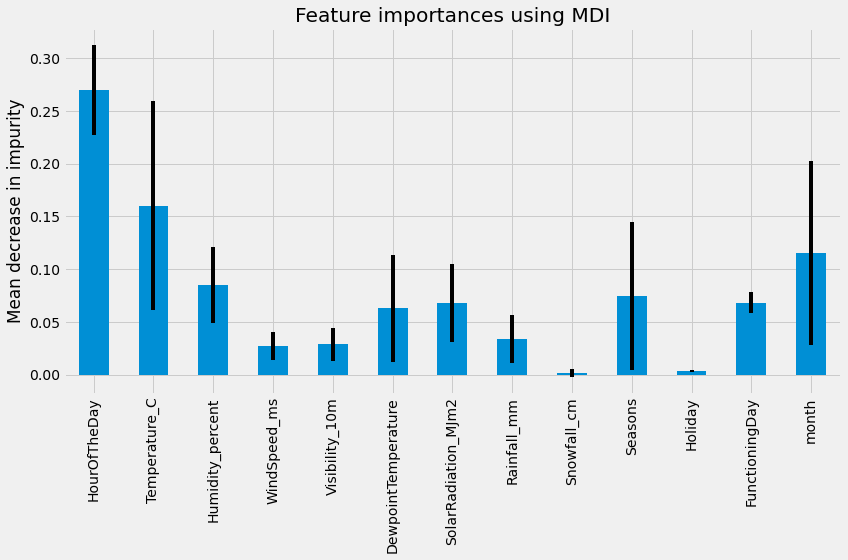

In [63]:
importances = best_model.feature_importances_

forest_importances = pd.Series(importances, index=feature_names)
std = np.std([tree.feature_importances_ for tree in best_model.estimators_], axis=0)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [64]:
from sklearn.inspection import permutation_importance

feature_names = [i for i in X_train.columns]
# Permutation importance
result = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=5509, n_jobs=-1)
forest_importances = pd.Series(result.importances_mean, index=feature_names)

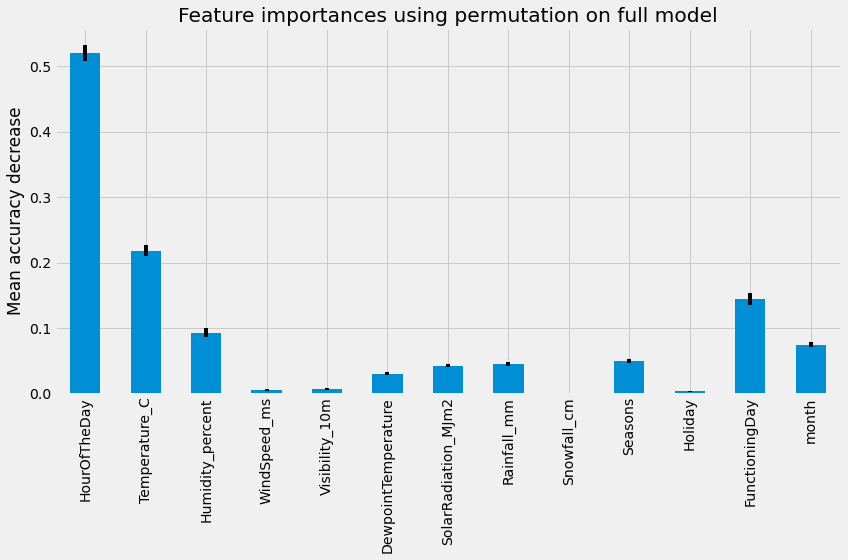

In [65]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature Importances Using Permutation on Best Model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout();

* <font size=4> To apply random search first was because it is a lot faster than running grid search. The main purpose of random search is to narrow down the number of possible hyperparameters.

* <font color=tomato>__The result of random forest was much better than linear regression model__</font>! We will try other ML methods.

* By using `permutation_importance`, we found some features had very small importance, so we will remove them and comparing the results with the rest of the models.</font>

#### <font color=tomato>Adaboost</font>

In [70]:
# The base estimator from which the boosted ensemble is built.
base_estimator = [DecisionTreeRegressor(max_depth=i) for i in range(1, 3)]
base_estimator.append(None)
# The maximum number of estimators at which boosting is terminated
n_estimators = [int(i) for i in np.linspace(start = 200, stop = 2000, num = 10)]
# Weight applied to each regressor at each boosting iteration.
learning_rate = np.linspace(start = 0, stop = 1, num = 10).round(2)
# The loss function to use when updating the weights after each boosting iteration.
loss = ['linear', 'square', 'exponential']

# Parameters for random search
random_search = {'base_estimator': base_estimator,
                'n_estimators': n_estimators,
                'learning_rate': learning_rate,
                'loss': loss,
                }
pprint(random_search)

{'base_estimator': [DecisionTreeRegressor(max_depth=1),
                    DecisionTreeRegressor(max_depth=2),
                    None],
 'learning_rate': array([0.  , 0.11, 0.22, 0.33, 0.44, 0.56, 0.67, 0.78, 0.89, 1.  ]),
 'loss': ['linear', 'square', 'exponential'],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [71]:
# Use the random grid to search for best hyperparameters
ada = AdaBoostRegressor()
ada_random = RandomizedSearchCV(estimator = ada, param_distributions = random_search, n_iter = 100, cv = 3, verbose=2, random_state = 5509, n_jobs = -1)
ada_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Users/ivanliu/opt/miniconda3/envs/new/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/ivanliu/opt/miniconda3/envs/new/lib/python3.9/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [ 0.46898067  0.42712393  0.33558044  0.33259223  0.26612367  0.44316938
  0.43396826         nan  0.27388399 -0.02352489  0.55197519  0.30635773
  0.6062612  -0.94068736  0.51400213  0.43744119  0.62980041         nan
  0.37039293  0.45242422  0.33068044  0.39267241  0.43405128  0.45296844
  0.44668571  0.54702362  0.37416329  0.2833354   0.2764193   0.28359233
         nan  0.27125168  0.29362196  0.60740825  0.42521628  0.28277718
  0.44440206  0.27925378  0.26247275  0.301925    0.38171427         nan
  0.25513257  0.62074929  0.28028691  0.5013842

RandomizedSearchCV(cv=3, estimator=AdaBoostRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'base_estimator': [DecisionTreeRegressor(max_depth=1),
                                                           DecisionTreeRegressor(max_depth=2),
                                                           None],
                                        'learning_rate': array([0.  , 0.11, 0.22, 0.33, 0.44, 0.56, 0.67, 0.78, 0.89, 1.  ]),
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=5509, verbose=2)

In [72]:
# The best hyperparameters
ada_random.best_params_

{'n_estimators': 2000,
 'loss': 'square',
 'learning_rate': 1.0,
 'base_estimator': None}

In [75]:
# Parameters for grid search
param_grid = {
    'n_estimators': [1500, 1800, 2000],
    'loss' : ['square'],
    'learning_rate': [1.0, 1.2, 1.5, 1.8, 2],
}
# Grid search
ada = AdaBoostRegressor()
grid_search = GridSearchCV(estimator = ada, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


GridSearchCV(cv=3, estimator=AdaBoostRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [1.0, 1.2, 1.5, 1.8, 2],
                         'loss': ['square'],
                         'n_estimators': [1500, 1800, 2000]},
             verbose=2)

In [76]:
# Get the best model from grid search
best_model = grid_search.best_estimator_
# Print out the results
print(f'Best score: {grid_search.best_score_:.3f}\n')
print('Best parameters:')
pprint(grid_search.best_params_)
print(f'\nTest data score: {grid_search.score(X_test, y_test):.3f}')
# Prediction
y_pred = best_model.predict(X_test)
print(f'MAE: {mean_absolute_error(y_test, y_pred):.2f}')

Best score: 0.702

Best parameters:
{'learning_rate': 1.8, 'loss': 'square', 'n_estimators': 1500}

Test data score: 0.697
MAE: 284.39


In [13]:
### Drop the features with less importance by permutation_importance and run grid search again

# Parameters for grid search
param_grid = {
    'n_estimators': [1500, 1800, 2000],
    'loss' : ['square'],
    'learning_rate': [1.0, 1.2, 1.5, 1.8, 2],
}
X_train_updated = X_train.drop(['WindSpeed_ms', 'Visibility_10m', 'DewpointTemperature', 'Snowfall_cm', 'Holiday',], axis = 1)
X_test_updated = X_test.drop(['WindSpeed_ms', 'Visibility_10m', 'DewpointTemperature', 'Snowfall_cm', 'Holiday',], axis = 1)

# Grid search
ada = AdaBoostRegressor()
grid_search = GridSearchCV(estimator = ada, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train_updated, y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] END ..learning_rate=1.0, loss=square, n_estimators=1500; total time=  12.2s
[CV] END ..learning_rate=1.0, loss=square, n_estimators=1500; total time=  12.4s
[CV] END ..learning_rate=1.0, loss=square, n_estimators=1500; total time=  12.6s
[CV] END ..learning_rate=1.0, loss=square, n_estimators=1800; total time=  14.9s
[CV] END ..learning_rate=1.0, loss=square, n_estimators=1800; total time=  15.1s
[CV] END ..learning_rate=1.0, loss=square, n_estimators=1800; total time=  15.3s
[CV] END ..learning_rate=1.0, loss=square, n_estimators=2000; total time=  16.3s
[CV] END ..learning_rate=1.0, loss=square, n_estimators=2000; total time=  16.7s
[CV] END ..learning_rate=1.2, loss=square, n_estimators=1500; total time=  12.8s
[CV] END ..learning_rate=1.2, loss=square, n_estimators=1500; total time=  13.1s
[CV] END ..learning_rate=1.2, loss=square, n_estimators=1500; total time=  12.9s
[CV] END ..learning_rate=1.0, loss=square, n_est

GridSearchCV(cv=3, estimator=AdaBoostRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [1.0, 1.2, 1.5, 1.8, 2],
                         'loss': ['square'],
                         'n_estimators': [1500, 1800, 2000]},
             verbose=2)

In [16]:
# Get the best model from grid search
best_model = grid_search.best_estimator_
# Print out the results
print(f'Best score: {grid_search.best_score_:.3f}\n')
print('Best parameters:')
pprint(grid_search.best_params_)
print(f'\nTest data score: {grid_search.score(X_test_updated, y_test):.3f}')
# Prediction
y_pred = best_model.predict(X_test_updated)
print(f'MAE: {mean_absolute_error(y_test, y_pred):.2f}')

Best score: 0.698

Best parameters:
{'learning_rate': 1.8, 'loss': 'square', 'n_estimators': 1500}

Test data score: 0.697
MAE: 279.37


In [21]:
from sklearn.preprocessing import StandardScaler
# Standardization the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_updated)
X_test_scaled = scaler.transform(X_test_updated)
# Grid search
ada = AdaBoostRegressor()
grid_search = GridSearchCV(estimator = ada, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 0)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=AdaBoostRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [1.0, 1.2, 1.5, 1.8, 2],
                         'loss': ['square'],
                         'n_estimators': [1500, 1800, 2000]})

In [22]:
# Get the best model from grid search
best_model = grid_search.best_estimator_
# Print out the results
print(f'Best score: {grid_search.best_score_:.3f}\n')
print('Best parameters:')
pprint(grid_search.best_params_)
print(f'\nTest data score: {grid_search.score(X_test_scaled, y_test):.3f}')
# Prediction
y_pred = best_model.predict(X_test_scaled)
print(f'MAE: {mean_absolute_error(y_test, y_pred):.2f}')

Best score: 0.703

Best parameters:
{'learning_rate': 1.8, 'loss': 'square', 'n_estimators': 1800}

Test data score: 0.701
MAE: 275.99


#### <font color=tomato>SVR</font>

In [23]:
# The strength of the regularization is inversely proportional to C.
c = np.logspace(-5, 5, 11, base = 2)

# The loss function 
loss = ['epsilon_insensitive', 'squared_epsilon_insensitive',]

# Parameters for random search
random_search = {'C': c,
                'loss': loss,
                }
pprint(random_search)

{'C': array([3.125e-02, 6.250e-02, 1.250e-01, 2.500e-01, 5.000e-01, 1.000e+00,
       2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01, 3.200e+01]),
 'loss': ['epsilon_insensitive', 'squared_epsilon_insensitive']}


In [24]:
# Use the random grid to search for best hyperparameters
svr = LinearSVR()
svr_random = RandomizedSearchCV(estimator = svr, param_distributions = random_search, n_iter = 100, cv = 3, verbose=2, random_state = 5509, n_jobs = -1)
svr_random.fit(X_train_updated, y_train)

/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 22 is smaller than n_iter=100. Running 22 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 22 candidates, totalling 66 fits


/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ................C=0.03125, loss=epsilon_insensitive; total time=   0.3s
[CV] END ................C=0.03125, loss=epsilon_insensitive; total time=   0.3s
[CV] END ................C=0.03125, loss=epsilon_insensitive; total time=   0.3s
[CV] END .................C=0.0625, loss=epsilon_insensitive; total time=   0.4s
[CV] END .................C=0.0625, loss=epsilon_insensitive; total time=   0.4s


/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ........C=0.03125, loss=squared_epsilon_insensitive; total time=   0.6s
[CV] END ........C=0.03125, loss=squared_epsilon_insensitive; total time=   0.6s
[CV] END ........C=0.03125, loss=squared_epsilon_insensitive; total time=   0.6s
[CV] END .................C=0.0625, loss=epsilon_insensitive; total time=   0.4s


/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarni

[CV] END .........C=0.0625, loss=squared_epsilon_insensitive; total time=   0.6s
[CV] END .........C=0.0625, loss=squared_epsilon_insensitive; total time=   0.6s
[CV] END ..................C=0.125, loss=epsilon_insensitive; total time=   0.5s
[CV] END .........C=0.0625, loss=squared_epsilon_insensitive; total time=   0.6s
[CV] END ..................C=0.125, loss=epsilon_insensitive; total time=   0.5s
[CV] END ..................C=0.125, loss=epsilon_insensitive; total time=   0.5s


/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ..........C=0.125, loss=squared_epsilon_insensitive; total time=   0.6s
[CV] END ..........C=0.125, loss=squared_epsilon_insensitive; total time=   0.5s


/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ...................C=0.25, loss=epsilon_insensitive; total time=   0.5s
[CV] END ..........C=0.125, loss=squared_epsilon_insensitive; total time=   0.5s
[CV] END ...................C=0.25, loss=epsilon_insensitive; total time=   0.5s
[CV] END ...................C=0.25, loss=epsilon_insensitive; total time=   0.5s
[CV] END ...........C=0.25, loss=squared_epsilon_insensitive; total time=   0.5s


/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ...........C=0.25, loss=squared_epsilon_insensitive; total time=   0.5s
[CV] END ...........C=0.25, loss=squared_epsilon_insensitive; total time=   0.6s


/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ....................C=0.5, loss=epsilon_insensitive; total time=   0.6s


/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ....................C=0.5, loss=epsilon_insensitive; total time=   0.6s
[CV] END ....................C=0.5, loss=epsilon_insensitive; total time=   0.6s
[CV] END ............C=0.5, loss=squared_epsilon_insensitive; total time=   0.6s
[CV] END ............C=0.5, loss=squared_epsilon_insensitive; total time=   0.7s


/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ....................C=1.0, loss=epsilon_insensitive; total time=   0.7s
[CV] END ............C=0.5, loss=squared_epsilon_insensitive; total time=   0.7s
[CV] END ....................C=1.0, loss=epsilon_insensitive; total time=   0.6s
[CV] END ....................C=1.0, loss=epsilon_insensitive; total time=   0.6s


/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ............C=1.0, loss=squared_epsilon_insensitive; total time=   0.6s
[CV] END ............C=1.0, loss=squared_epsilon_insensitive; total time=   0.6s
[CV] END ............C=1.0, loss=squared_epsilon_insensitive; total time=   0.7s
[CV] END ....................C=2.0, loss=epsilon_insensitive; total time=   0.6s


/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ....................C=2.0, loss=epsilon_insensitive; total time=   0.6s
[CV] END ....................C=2.0, loss=epsilon_insensitive; total time=   0.7s
[CV] END ............C=2.0, loss=squared_epsilon_insensitive; total time=   0.6s
[CV] END ............C=2.0, loss=squared_epsilon_insensitive; total time=   0.6s


/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarni

[CV] END ............C=2.0, loss=squared_epsilon_insensitive; total time=   0.5s
[CV] END ....................C=4.0, loss=epsilon_insensitive; total time=   0.5s
[CV] END ....................C=4.0, loss=epsilon_insensitive; total time=   0.5s
[CV] END ....................C=4.0, loss=epsilon_insensitive; total time=   0.5s
[CV] END ............C=4.0, loss=squared_epsilon_insensitive; total time=   0.5s
[CV] END ............C=4.0, loss=squared_epsilon_insensitive; total time=   0.5s


/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ............C=4.0, loss=squared_epsilon_insensitive; total time=   0.4s
[CV] END ....................C=8.0, loss=epsilon_insensitive; total time=   0.4s


/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ....................C=8.0, loss=epsilon_insensitive; total time=   0.5s
[CV] END ....................C=8.0, loss=epsilon_insensitive; total time=   0.5s
[CV] END ............C=8.0, loss=squared_epsilon_insensitive; total time=   0.5s
[CV] END ............C=8.0, loss=squared_epsilon_insensitive; total time=   0.5s
[CV] END ............C=8.0, loss=squared_epsilon_insensitive; total time=   0.5s


/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ...................C=16.0, loss=epsilon_insensitive; total time=   0.5s
[CV] END ...................C=16.0, loss=epsilon_insensitive; total time=   0.5s
[CV] END ...................C=16.0, loss=epsilon_insensitive; total time=   0.5s


/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarni

[CV] END ...........C=16.0, loss=squared_epsilon_insensitive; total time=   0.6s
[CV] END ...........C=16.0, loss=squared_epsilon_insensitive; total time=   0.6s
[CV] END ...........C=16.0, loss=squared_epsilon_insensitive; total time=   0.6s
[CV] END ...................C=32.0, loss=epsilon_insensitive; total time=   0.6s
[CV] END ...................C=32.0, loss=epsilon_insensitive; total time=   0.6s
[CV] END ...................C=32.0, loss=epsilon_insensitive; total time=   0.5s
[CV] END ...........C=32.0, loss=squared_epsilon_insensitive; total time=   0.5s


/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ...........C=32.0, loss=squared_epsilon_insensitive; total time=   0.5s
[CV] END ...........C=32.0, loss=squared_epsilon_insensitive; total time=   0.4s


/opt/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=LinearSVR(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': array([3.125e-02, 6.250e-02, 1.250e-01, 2.500e-01, 5.000e-01, 1.000e+00,
       2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01, 3.200e+01]),
                                        'loss': ['epsilon_insensitive',
                                                 'squared_epsilon_insensitive']},
                   random_state=5509, verbose=2)

In [25]:
# The best hyperparameters
svr_random.best_params_

{'loss': 'epsilon_insensitive', 'C': 1.0}

In [28]:
# Parameters for grid search
param_grid = {
    'C': [0.5, 0.8, 1.0, 1.2, 1.5],
    'loss' : ['epsilon_insensitive'],
}
# Grid search
svr = LinearSVR()
grid_search = GridSearchCV(estimator = svr, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 0)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=LinearSVR(), n_jobs=-1,
             param_grid={'C': [0.5, 0.8, 1.0, 1.2, 1.5],
                         'loss': ['epsilon_insensitive']})

In [29]:
# Get the best model from grid search
best_model = grid_search.best_estimator_
# Print out the results
print(f'Best score: {grid_search.best_score_:.3f}\n')
print('Best parameters:')
pprint(grid_search.best_params_)
print(f'\nTest data score: {grid_search.score(X_test_scaled, y_test):.3f}')
# Prediction
y_pred = best_model.predict(X_test_scaled)
print(f'MAE: {mean_absolute_error(y_test, y_pred):.2f}')

Best score: 0.606

Best parameters:
{'C': 1.5, 'loss': 'epsilon_insensitive'}

Test data score: 0.615
MAE: 296.68


#### <font color=tomato>LightGMB</font>

In [34]:
np.linspace(0.1, 1.5, 12).round(2)

array([0.1 , 0.23, 0.35, 0.48, 0.61, 0.74, 0.86, 0.99, 1.12, 1.25, 1.37,
       1.5 ])

In [42]:
boosting_type = ['gbdt', 'dart', 'goss', 'rf']
# Number of boosted trees to fit.
n_estimators = [int(i) for i in np.linspace(start = 200, stop = 2000, num = 10)]
# Boosting learning rate. 
learning_rate = np.linspace(0.1, 1.5, 12).round(2)
# Maximum number of levels in tree
max_depth = [int(i) for i in np.linspace(10, 110, num = 11)]
max_depth.append(-1)
# The number of features to consider when looking for the best split
num_leaves = [i for i in range(1, 46)]
# Minimum number of data needed in a child (leaf).
min_child_samples = [10, 15, 20, 25, 30]


# Parameters for random search
random_search = {'n_estimators': n_estimators,
                'boosting_type': boosting_type,
                'learning_rate': learning_rate,
                'max_depth': max_depth,
                'num_leaves': num_leaves,
                'min_child_samples': min_child_samples,
                }
pprint(random_search)

{'boosting_type': ['gbdt', 'dart', 'goss', 'rf'],
 'learning_rate': array([0.1 , 0.23, 0.35, 0.48, 0.61, 0.74, 0.86, 0.99, 1.12, 1.25, 1.37,
       1.5 ]),
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, -1],
 'min_child_samples': [10, 15, 20, 25, 30],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'num_leaves': [1,
                2,
                3,
                4,
                5,
                6,
                7,
                8,
                9,
                10,
                11,
                12,
                13,
                14,
                15,
                16,
                17,
                18,
                19,
                20,
                21,
                22,
                23,
                24,
                25,
                26,
                27,
                28,
                29,
                30,
                31,
                32,
                33,
        

In [43]:
# Use the random grid to search for best hyperparameters
lgbm = LGBMRegressor()
lgbm_random = RandomizedSearchCV(estimator = lgbm, param_distributions = random_search, n_iter = 100, cv = 3, verbose=0, random_state = 5509, n_jobs = -1)
lgbm_random.fit(X_train_updated, y_train)

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /Users/runner/miniforge3/conda-bld/lightgbm_1666917128705/work/compile/src/io/config_auto.cpp, line 334 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /Users/runner/miniforge3/conda-bld/lightgbm_1666917128705/work/compile/src/io/config_auto.cpp, line 334 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /Users/runner/miniforge3/conda-bld/lightgbm_1666917128705/work/compile/src/io/config_auto.cpp, line 334 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /Users/runner/miniforge3/conda-bld/lightgbm_1666917128705/work/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /Users/runner/miniforge3/conda-bld/lightgbm_1666917128705/work/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->baggi

RandomizedSearchCV(cv=3, estimator=LGBMRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'boosting_type': ['gbdt', 'dart',
                                                          'goss', 'rf'],
                                        'learning_rate': array([0.1 , 0.23, 0.35, 0.48, 0.61, 0.74, 0.86, 0.99, 1.12, 1.25, 1.37,
       1.5 ]),
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      -1],
                                        'min_child_samples': [10, 15, 20, 25,
                                                              30],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000],
                                        'num_leaves': [1, 2, 3, 4, 5, 6, 7, 8,
                                                       9, 10, 11, 12, 13, 14,
                                                       15, 16, 17, 18, 19, 20,
                                                       21, 22, 23, 24, 25, 26,
                                                       27, 28, 29, 30, ...]},
                   random_state=5509)

In [45]:
# The best hyperparameters
lgbm_random.best_params_

{'num_leaves': 12,
 'n_estimators': 400,
 'min_child_samples': 30,
 'max_depth': 110,
 'learning_rate': 0.1,
 'boosting_type': 'dart'}

In [47]:
# Parameters for grid search
param_grid = {
    'boosting_type' : ['dart'],
    'num_leaves': [10, 12, 14],
    'max_depth': [90, 110, 130],
    'learning_rate': [0.05, 0.07, 0.1, 0.15, 0.2],
    'min_child_samples': [25, 30, 35],
    'n_estimators': [200, 400, 600]
}
# Grid search
lgbm = LGBMRegressor()
grid_search = GridSearchCV(estimator = lgbm, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 0)
grid_search.fit(X_train_updated, y_train)

GridSearchCV(cv=3, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'boosting_type': ['dart'],
                         'learning_rate': [0.05, 0.07, 0.1, 0.15, 0.2],
                         'max_depth': [90, 110, 130],
                         'min_child_samples': [25, 30, 35],
                         'n_estimators': [200, 400, 600],
                         'num_leaves': [10, 12, 14]})

In [48]:
# Get the best model from grid search
best_model = grid_search.best_estimator_
# Print out the results
print(f'Best score: {grid_search.best_score_:.3f}\n')
print('Best parameters:')
pprint(grid_search.best_params_)
print(f'\nTest data score: {grid_search.score(X_test_updated, y_test):.3f}')
# Prediction
y_pred = best_model.predict(X_test_updated)
print(f'MAE: {mean_absolute_error(y_test, y_pred):.2f}')

Best score: 0.863

Best parameters:
{'boosting_type': 'dart',
 'learning_rate': 0.15,
 'max_depth': 90,
 'min_child_samples': 30,
 'n_estimators': 400,
 'num_leaves': 12}

Test data score: 0.881
MAE: 141.34


In [49]:
# Get the best model from grid search
best_model = grid_search.best_estimator_.fit(X_train_scaled, y_train)
# Print out the results
print(f'Best score: {best_model.score(X_train_scaled, y_train):.3f}\n')
print('Best parameters:')
pprint(grid_search.best_params_)
print(f'\nTest data score: {best_model.score(X_test_scaled, y_test):.3f}')
# Prediction
y_pred = best_model.predict(X_test_scaled)
print(f'MAE: {mean_absolute_error(y_test, y_pred):.2f}')

Best score: 0.917

Best parameters:
{'boosting_type': 'dart',
 'learning_rate': 0.15,
 'max_depth': 90,
 'min_child_samples': 30,
 'n_estimators': 400,
 'num_leaves': 12}

Test data score: 0.879
MAE: 141.74


### <font color=Steelblue>Conclusion</font>

* <font size=4>Let's see three plots and make the conclusion!</font>

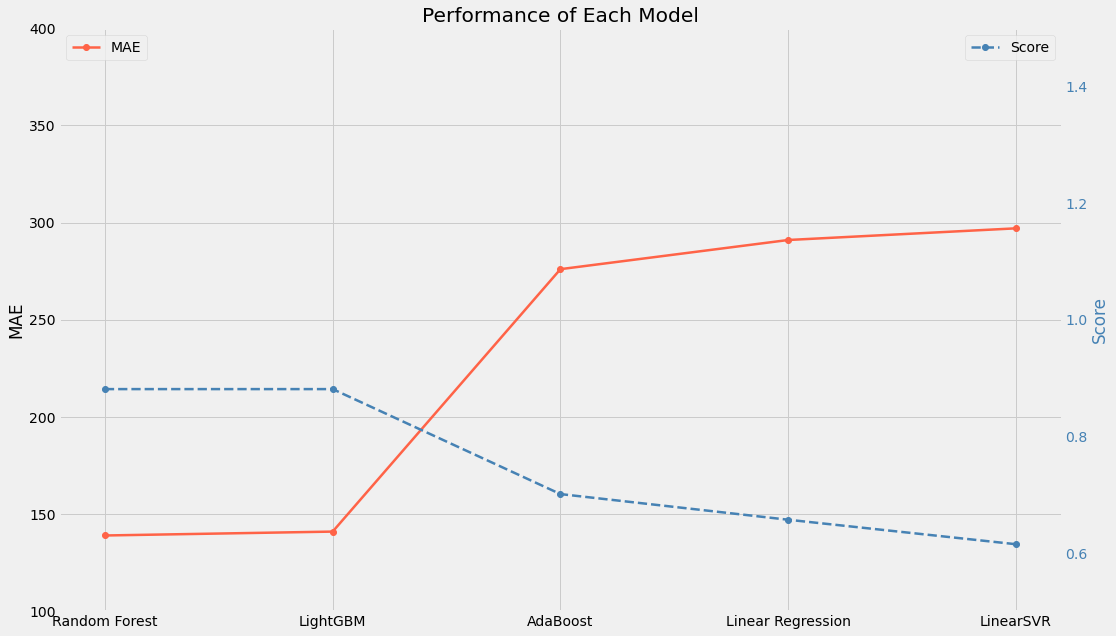

In [46]:
# Let's compare the results of each model 
models = ['Random Forest', 'LightGBM', 'AdaBoost', 'Linear Regression', 'LinearSVR',] 
mae = [139, 141, 276, 291, 297,]
score = [ 0.881, 0.881, 0.701, 0.657, 0.615,]
fig, ax = plt.subplots(figsize = (16, 10))
ax2 = ax.twinx()
# MAE
ax.plot(models, mae, lw = 2.5, label = 'MAE', c = 'tomato', marker = 'o')
# Score
ax2.plot(models, score, ls = '--', lw = 2.5, label = 'Score', c = 'steelblue', marker = 'o')
ax2.set_ylabel('Score', color='steelblue',)
ax2.tick_params(axis='y', labelcolor='steelblue')
ax2.grid(False)
ax2.legend(loc = 1)
ax2.set_ylim(0.5, 1.5)

ax.legend(loc = 2)
ax.set_ylim(100, 400)
ax.set_ylabel('MAE')
ax.set_title('Performance of Each Model');

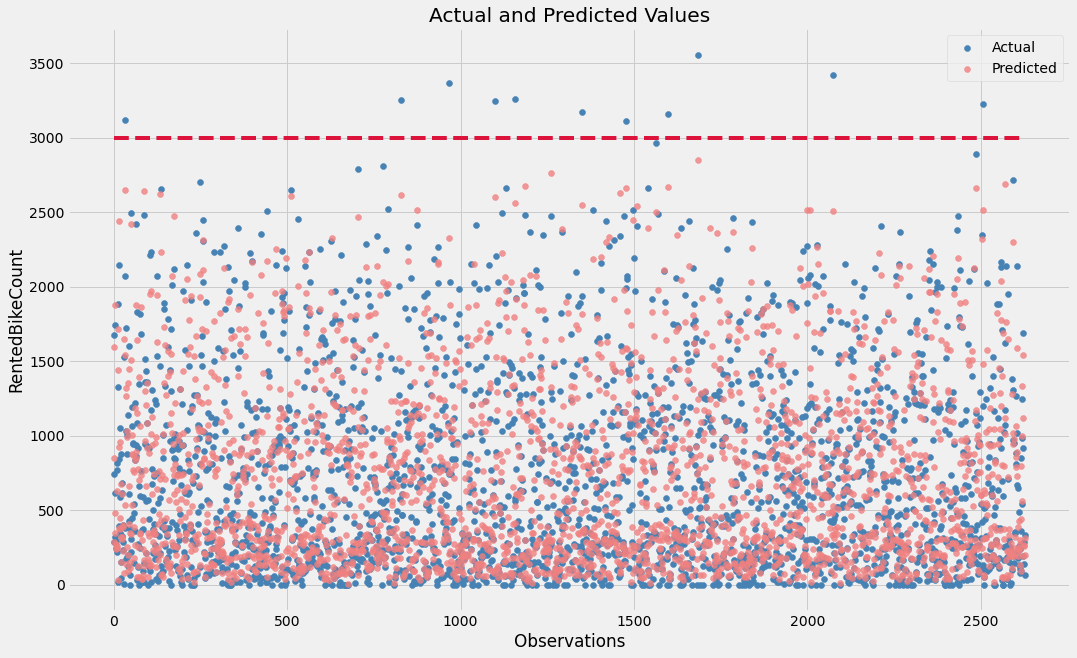

In [36]:
# Plot of predicted and actual labels
y = y_test.reset_index(drop = True)
fig, ax = plt.subplots(figsize = (16, 10))
ax.scatter(y.index, y, label = 'Actual', c = 'steelblue', )
ax.scatter(y.index, y_pred, label = 'Predicted', c = 'lightcoral', alpha = 0.8)
# Add a line to identify possible outliers
ax.hlines(y = 3000, xmin=0, xmax=y.index[-1], colors = 'crimson', ls = '--')
ax.legend()
ax.set_xlabel('Observations')
ax.set_ylabel('RentedBikeCount')
ax.set_title('Actual and Predicted Values');

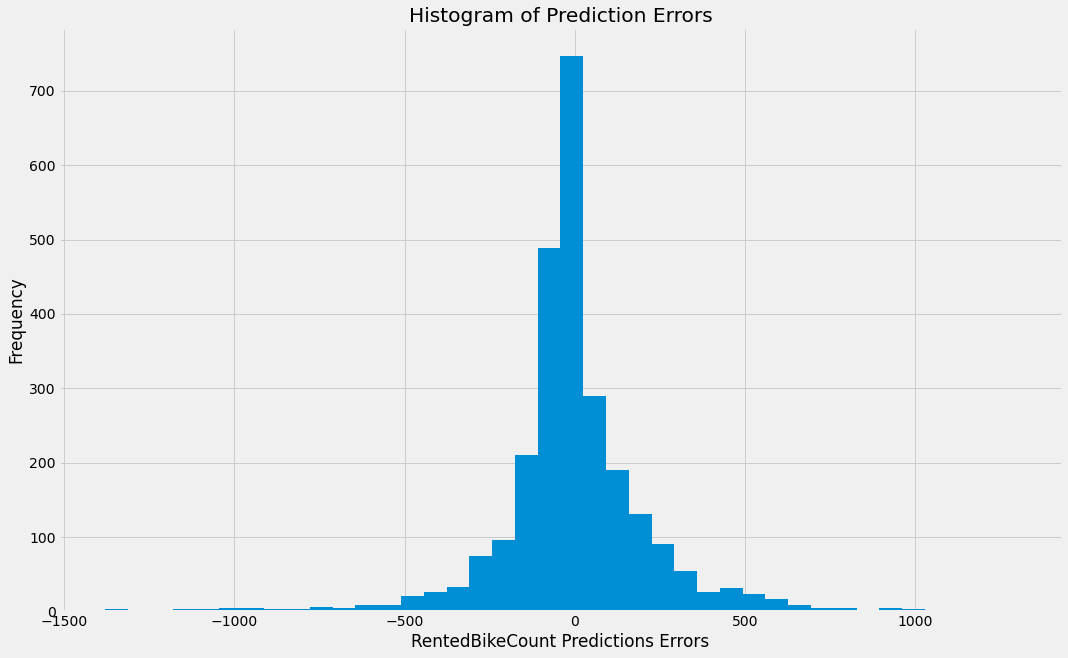

In [44]:
# The histogram of prediction errors
# Prediction error
diff = y.to_numpy() - y_pred
# Histogram
fig, ax = plt.subplots(figsize = (16, 10))
ax.hist(diff, bins = 40)
ax.set_xlabel('RentedBikeCount Predictions Errors')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Prediction Errors');

1. <font size=4>For the first plot, we found that among all models, the tree models yielded the best result with the score reaching nearly 0.9. The random forest had the least MAE, and the same score as the LightGBM’s. However, despite the fact that the results were good, we still need the domain experts’ help to evaluate them. We are not quite sure if the error is acceptable to the rental bike company. 

2. To take a closer look at the prediction errors from the second and third plot, we can clearly see most of the predicted labels are near the actual labels from the second plot. The third plot also shows that the highest frequency of prediction errors are around zero. However, there were no predicted labels above the dotted red line and the highest predicted errors were over 1000; therefore, this may be the main reason causing the `MAE` over 100. In our EDA part, we plotted the density of the target, `RentedBikeCount`, and we found it was really rare for the target to be over 3000. Thus, it is possible that we may see those labels over 3000 as outliers. Nevertheless, since we were not quite sure what was the reason resulting in the unusual rented bike count(maybe the malfunction of bike stations, special event in Seoul, etc.), as mentioned earlier, it would be better to have a domain expert decide whether those labels are outliers.

3. To sum up, we spend most effort to understand the dataset (the EDA part), and it really helped us to figure out what might be important features in terms of the target. On the other hand, the dataset is also a time-series data, if we were able to acquire the data with longer time period, like more than three years, we could also try time-series algorithm to forecast the target, and compare the results with the machine learning methods we used here.</font>